### Importing Required Libraries

In [3]:
import copy
import anndata
import joblib
import warnings
from typing import Optional, Union
import cv2
import scanpy as sc
from anndata import AnnData
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import warnings
import seaborn as sns
import operator
warnings.filterwarnings("ignore")
Path = "/home/uqomulay/90days/STimageOutputs/"

### Figure S6 Panel a

#### To generate LIME and SHAP ouputs run the following python scripts:- 
Regression:- https://github.com/BiomedicalMachineLearning/STimage/blob/master/development/STimage_Interpretability_Regression.py

Classification:- https://github.com/BiomedicalMachineLearning/STimage/blob/master/development/STimage_Interpretability_Classification.py

LIME Classificaiton Results
2nd row GNAS - Cancer Gene
3rd row C3 - Immune Gene
SHAP Classificaiton Results
4th row GNAS - Cancer Gene
5th row C3 - Immune Gene


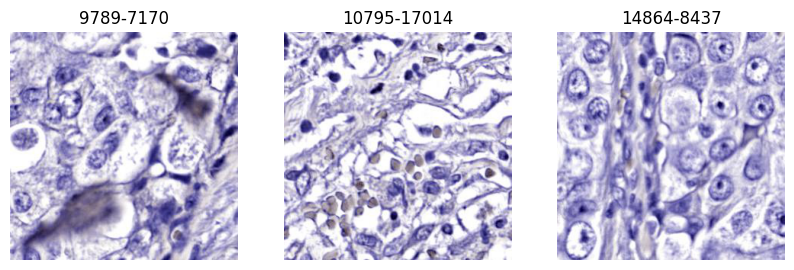

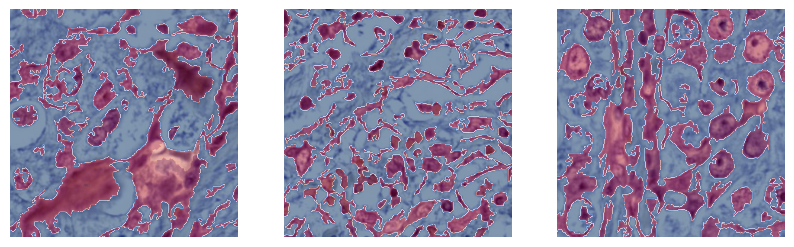

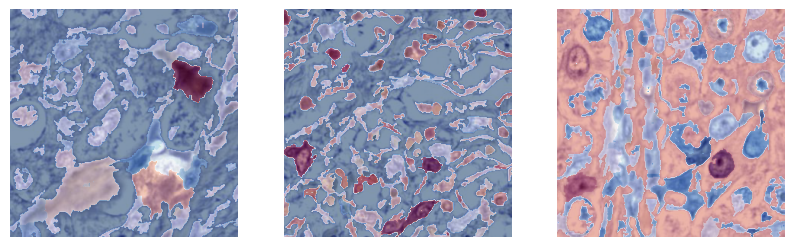

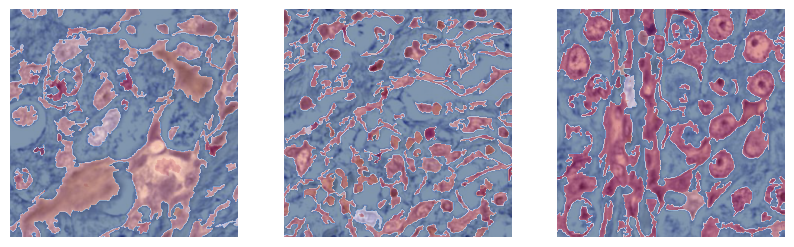

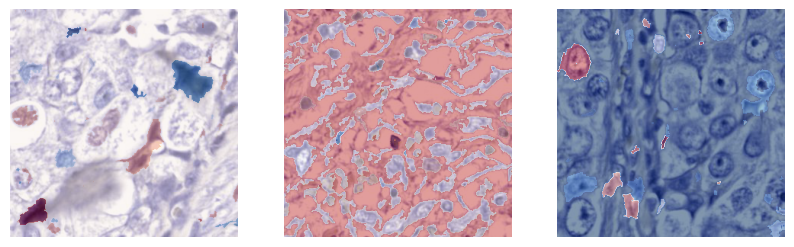

In [9]:
####################### Importing Saved Files for Regression ############################

Path_Regression = "/home/uqomulay/90days/STimageOutputs/SHAP_LIMEREG/"
images = np.load('/home/uqomulay/90days/STimageOutputs/SHAP_LIME/image_dir',allow_pickle=True)
f = operator.itemgetter(3,11,18)
images = list(f(images))
image_dir = []
for i in images:
    image_dir.append("/home/uqomulay/90days/STimageOutputs/tiles/tiles/"+i.split("/")[7])

#Immune
FFPE_C3_LIMEMask_scaled = np.load(Path_Regression+"FFPE_C3_LIMEREGMask_scaled.npy")
FFPE_C3_LIMEMask_scaled = FFPE_C3_LIMEMask_scaled[[3,11,18],:,:]
shap_values_C3_agnostic = np.load(Path_Regression+"shap_values_C3_agnostic",allow_pickle=True)
shap_values_C3_agnostic = f(shap_values_C3_agnostic)
shap_segments_C3_agnostic = np.load(Path_Regression+"shap_segments_C3_agnostic",allow_pickle=True)
shap_segments_C3_agnostic = f(shap_segments_C3_agnostic)

#Cancer
FFPE_GNAS_LIMEMask_scaled = np.load(Path_Regression+"FFPE_GNAS_LIMEREGMask_scaled.npy")
FFPE_GNAS_LIMEMask_scaled = FFPE_GNAS_LIMEMask_scaled[[3,11,18],:,:]
shap_values_GNAS_agnostic = np.load(Path_Regression+"shap_values_GNAS_agnostic",allow_pickle=True)
shap_values_GNAS_agnostic = f(shap_values_GNAS_agnostic)
shap_segments_GNAS_agnostic = np.load(Path_Regression+"shap_segments_GNAS_agnostic",allow_pickle=True)
shap_segments_GNAS_agnostic = f(shap_segments_GNAS_agnostic)


################################################ Test Image Tiles ########################################
plt.figure(figsize=(10,10))
for num, x in enumerate(image_dir):
    img = Image.open(x)
    plt.subplot(1,3,num+1)
    plt.axis('off')
    plt.title(image_dir[num][54:][:-9])
    plt.imshow(img)

    
####################### Regression LIME Cancer and Immune Gene ##########################################

print("LIME Classificaiton Results")
# Cancer 
print("2nd row GNAS - Cancer Gene")
plt.figure(figsize=(10,10))
for i in range(len(FFPE_GNAS_LIMEMask_scaled)):
    plt.subplot(1,3,i+1)
    plt.axis('off')
    plt.imshow(FFPE_GNAS_LIMEMask_scaled[i], cmap ="RdBu_r")
    plt.imshow(Image.open(image_dir[i]),alpha=0.5)
    
# Immune
print("3rd row C3 - Immune Gene")
plt.figure(figsize=(10,10))
for i in range(len(FFPE_C3_LIMEMask_scaled)):
    plt.subplot(1,3,i+1)
    plt.axis('off')
    plt.imshow(FFPE_C3_LIMEMask_scaled[i],cmap ="RdBu_r")
    plt.imshow(Image.open(image_dir[i]),alpha=0.5)
    
####################### Regression LIME Cancer and Immune Gene #######################################

shap_segments_scores_GNAS_agnostic = [] 
for j in range(0,3):
    out = np.zeros((299,299))
    for i in range(0,shap_segments_GNAS_agnostic[j].max()):
        out[shap_segments_GNAS_agnostic[j] == i] = shap_values_GNAS_agnostic[j][0][0][i]
    shap_segments_scores_GNAS_agnostic.append(out)
    
shap_segments_scores_C3_agnostic = [] 
for j in range(0,3):
    out = np.zeros((299,299))
    for i in range(0,shap_segments_C3_agnostic[j].max()):
        out[shap_segments_C3_agnostic[j] == i] = shap_values_C3_agnostic[j][0][0][i]
    shap_segments_scores_C3_agnostic.append(out)
    
print("SHAP Classificaiton Results")
# Cancer 
print("4th row GNAS - Cancer Gene")
plt.figure(figsize=(10,10))
for i in range(len(shap_segments_scores_GNAS_agnostic)):
    plt.subplot(1,3,i+1)
    plt.axis('off')
    plt.imshow(shap_segments_scores_GNAS_agnostic[i], cmap ="RdBu_r")
    plt.imshow(Image.open(image_dir[i]),alpha=0.5)
    
print("5th row C3 - Immune Gene")
# Immune
plt.figure(figsize=(10,10))
for i in range(len(shap_segments_scores_C3_agnostic)):
    plt.subplot(1,3,i+1)
    plt.axis('off')
    plt.imshow(shap_segments_scores_C3_agnostic[i],cmap ="RdBu_r")
    plt.imshow(Image.open(image_dir[i]),alpha=0.5)


LIME Classificaiton Results
2nd row GNAS - Cancer Gene
3rd row C3 - Immune Gene
SHAP Classificaiton Results
4th row GNAS - Cancer Gene
5th row C3 - Immune Gene


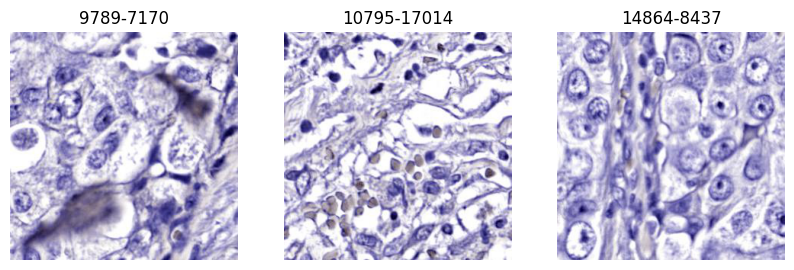

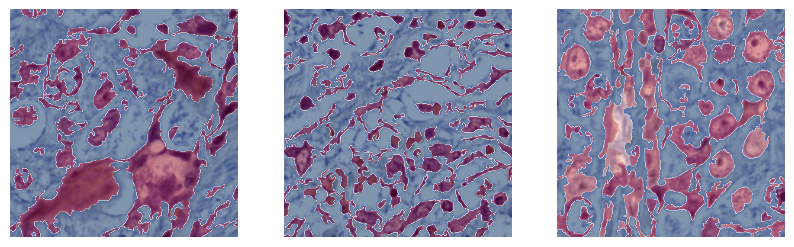

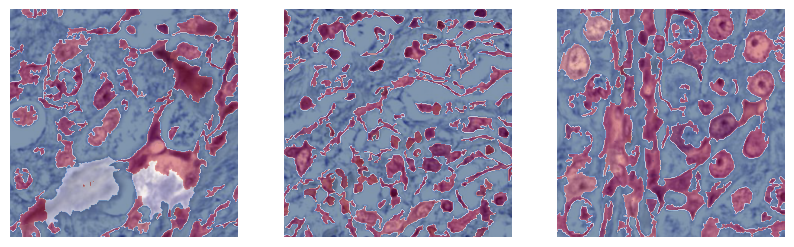

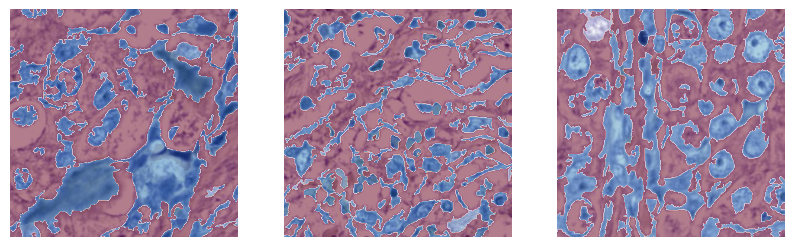

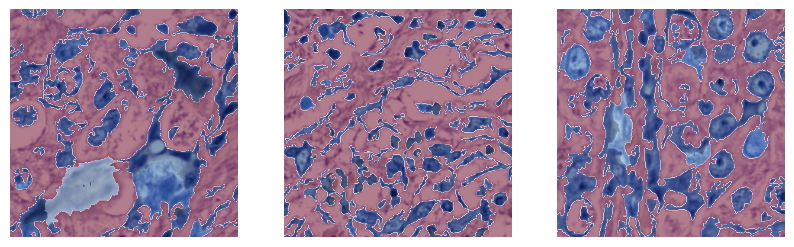

In [11]:
############################# Importing Saved Files for Classification ##################################

Path_Classification = "/home/uqomulay/90days/STimageOutputs/SHAP_LIME/"
images = np.load('/home/uqomulay/90days/STimageOutputs/SHAP_LIME/image_dir',allow_pickle=True)
images = list(f(images))
image_dir = []
for i in images:
    image_dir.append("/home/uqomulay/90days/STimageOutputs/tiles/tiles/"+i.split("/")[7])

#Immune
FFPE_C3_LIMEMask_scaled = np.load(Path_Classification+"FFPE_C3_LIMEMask_scaled.npy")
FFPE_C3_LIMEMask_scaled = FFPE_C3_LIMEMask_scaled[[3,11,18],:,:]
shap_values_C3_agnostic = np.load(Path_Classification+"shap_values_C3_agnostic",allow_pickle=True)
shap_values_C3_agnostic = f(shap_values_C3_agnostic)
shap_segments_C3_agnostic = np.load(Path_Classification+"shap_segments_C3_agnostic",allow_pickle=True)
shap_segments_C3_agnostic = f(shap_segments_C3_agnostic)

#Cancer
FFPE_GNAS_LIMEMask_scaled = np.load(Path_Classification+"FFPE_GNAS_LIMEMask_scaled.npy")
FFPE_GNAS_LIMEMask_scaled = FFPE_GNAS_LIMEMask_scaled[[3,11,18],:,:]
shap_values_GNAS_agnostic = np.load(Path_Classification+"shap_values_GNAS_agnostic",allow_pickle=True)
shap_values_GNAS_agnostic = f(shap_values_GNAS_agnostic)
shap_segments_GNAS_agnostic = np.load(Path_Classification+"shap_segments_GNAS_agnostic",allow_pickle=True)
shap_segments_GNAS_agnostic = f(shap_segments_GNAS_agnostic)


################################################ Test Image Tiles ########################################
plt.figure(figsize=(10,10))
for num, x in enumerate(image_dir):
    img = Image.open(x)
    plt.subplot(1,3,num+1)
    plt.axis('off')
    plt.title(image_dir[num][54:][:-9])
    plt.imshow(img)
    
####################### Classification LIME Cancer and Immune Gene ##########################################

print("LIME Classificaiton Results")
# Cancer 
print("2nd row GNAS - Cancer Gene")
plt.figure(figsize=(10,10))
for i in range(len(FFPE_GNAS_LIMEMask_scaled)):
    plt.subplot(1,3,i+1)
    plt.axis('off')
    plt.imshow(FFPE_GNAS_LIMEMask_scaled[i], cmap ="RdBu_r")
    plt.imshow(Image.open(image_dir[i]),alpha=0.5)
# Immune
print("3rd row C3 - Immune Gene")
plt.figure(figsize=(10,10))
for i in range(len(FFPE_C3_LIMEMask_scaled)):
    plt.subplot(1,3,i+1)
    plt.axis('off')
    plt.imshow(FFPE_C3_LIMEMask_scaled[i],cmap ="RdBu_r")
    plt.imshow(Image.open(image_dir[i]),alpha=0.5)
    
####################### Classification LIME Cancer and Immune Gene #######################################

shap_segments_scores_GNAS_agnostic = [] 
for j in range(0,3):
    out = np.zeros((299,299))
    for i in range(0,shap_segments_GNAS_agnostic[j].max()):
        out[shap_segments_GNAS_agnostic[j] == i] = shap_values_GNAS_agnostic[j][0][0][i]
    shap_segments_scores_GNAS_agnostic.append(out)
    
shap_segments_scores_C3_agnostic = [] 
for j in range(0,3):
    out = np.zeros((299,299))
    for i in range(0,shap_segments_C3_agnostic[j].max()):
        out[shap_segments_C3_agnostic[j] == i] = shap_values_C3_agnostic[j][0][0][i]
    shap_segments_scores_C3_agnostic.append(out)
    
print("SHAP Classificaiton Results")
# Cancer 
print("4th row GNAS - Cancer Gene")
plt.figure(figsize=(10,10))
for i in range(len(shap_segments_scores_GNAS_agnostic)):
    plt.subplot(1,3,i+1)
    plt.axis('off')
    plt.imshow(shap_segments_scores_GNAS_agnostic[i], cmap ="RdBu_r")
    plt.imshow(Image.open(image_dir[i]),alpha=0.5)
    
# Immune
print("5th row C3 - Immune Gene")
plt.figure(figsize=(10,10))
for i in range(len(shap_segments_scores_C3_agnostic)):
    plt.subplot(1,3,i+1)
    plt.axis('off')
    plt.imshow(shap_segments_scores_C3_agnostic[i],cmap ="RdBu_r")
    plt.imshow(Image.open(image_dir[i]),alpha=0.5)
